In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from matplotlib import pyplot as plt
import pc  # custom module

# Check CUDA support
if len(tf.config.list_physical_devices("GPU")) > 0:
    print("CUDA enabled.")
else:
    print("CUDA not enabled.")

# Path to dataset
data_folder = "/app/data"
# Training parameters
EP = 20
BS = 64
# Image resolution
RES = (256, 256)
# Random seed
SEED = 42

# Enable automatic mixed precision (not compatible with my GPU GeForce GTX 1060 6GB)
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

CUDA enabled.


In [2]:
data_dict = pc.create_dataset(
    data_folder,
    epochs=EP,
    batch_size=BS,
    res=RES,
    seed=SEED,
)

In [3]:
train_dataset = data_dict["train_dataset"]
val_dataset = data_dict["val_dataset"]
test_dataset = data_dict["test_dataset"]
train_len = data_dict["train_len"]
val_len = data_dict["val_len"]
test_len = data_dict["test_len"]
label_encoder = data_dict["label_encoder"]

print(f"Number of training samples: {train_len}")
print(f"Number of validation samples: {val_len}")
print(f"Number of test samples: {test_len}")

Number of training samples: 5329
Number of validation samples: 665
Number of test samples: 665


Image shape (256, 256, 3)
Label shape ()
----------------------------------------------------------------------------------------------------
['Aerodactyl']


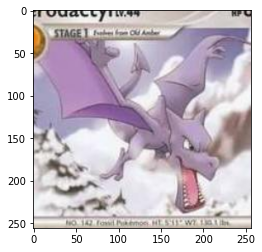

In [4]:
for (image, label) in test_dataset:
    print("Image shape", image.shape)
    print("Label shape", label.shape)
    print("-" * 100)
    print(label_encoder.inverse_transform([label]))
    plt.imshow(image)
    break

In [5]:
model = pc.create_model(res=RES, n_conv=5)
model.summary()

Model: "Pokemon-classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64) 

In [6]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    epochs=EP,
    steps_per_epoch=train_len // BS,
    validation_data=val_dataset,
    validation_steps=val_len // BS
)

Epoch 1/20
83/83 [==============================] - 13s 114ms/step - loss: 4.8515 - accuracy: 0.0147 - val_loss: 5.0537 - val_accuracy: 0.0000e+00
Epoch 2/20
83/83 [==============================] - 9s 101ms/step - loss: 4.0860 - accuracy: 0.0294 - val_loss: 6.8116 - val_accuracy: 0.0000e+00
Epoch 3/20
83/83 [==============================] - 8s 102ms/step - loss: 3.7002 - accuracy: 0.0479 - val_loss: 9.1159 - val_accuracy: 0.0000e+00
Epoch 4/20
83/83 [==============================] - 8s 100ms/step - loss: 3.6318 - accuracy: 0.0460 - val_loss: 9.0570 - val_accuracy: 0.0000e+00
Epoch 5/20
83/83 [==============================] - 8s 96ms/step - loss: 3.6864 - accuracy: 0.0429 - val_loss: 6.6206 - val_accuracy: 0.0000e+00
Epoch 6/20
83/83 [==============================] - 8s 96ms/step - loss: 3.6606 - accuracy: 0.0488 - val_loss: 6.7042 - val_accuracy: 0.0000e+00
Epoch 7/20
83/83 [==============================] - 8s 99ms/step - loss: 3.6391 - accuracy: 0.0431 - val_loss: 7.3430 - val_a

In [ ]:
# Save model (tensorflow standard format)
model.save("model1")